In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

def plot_boundaries(X_train, X_test, y_train, y_test, score, probability_func, h = .02, ax = None):
    X = np.vstack((X_test, X_train))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    if ax is None:
        ax = plt.subplot(1, 1, 1)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    Z = probability_func(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    cf = ax.contourf(xx, yy, Z, 50, cmap=cm, alpha=.8)
    plt.colorbar(cf, ax=ax)
    #plt.colorbar(Z,ax=ax)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', s=100)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6, s=200)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=40, horizontalalignment='right')
    


In [2]:
# Importo los datos: chip_tests.txt

data_chip = np.genfromtxt("./datasets/student_admission.txt", delimiter=",")

x = data_chip[:,0:2]
y = data_chip[:,2]

print(np.shape(x))
print(x[0:3,0:2])
print(y[0:3])
xMean = np.mean(x,axis=0)
xStd = np.std(x,axis=0)
print('Valores Medios:', xMean)
print('Desviacion Standard:', xStd)


(100, 2)
[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]]
[0. 0. 0.]
Valores Medios: [65.64427406 66.22199809]
Desviacion Standard: [19.36068671 18.48963567]


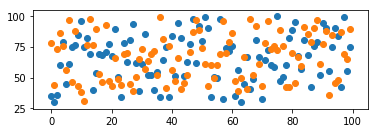

In [3]:
# Grafico de los datos

ax = plt.subplot(2, 1, 1)
ax.scatter(np.arange(np.shape(x)[0]),x[:,0])
ax.scatter(np.arange(np.shape(x)[0]),x[:,1])
plt.show()

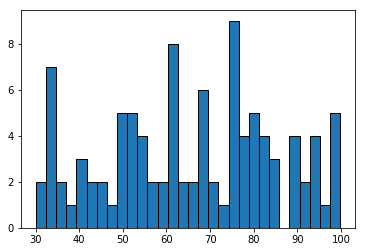

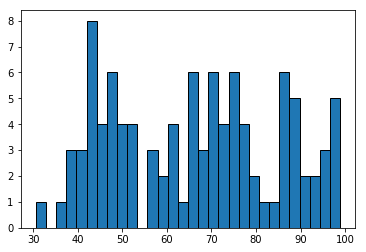

In [4]:
# Grafico histogramas

frq, edges = np.histogram(x[:,0], 30)
fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), ec="k", align="edge")
plt.show()

frq, edges = np.histogram(x[:,1], 30)
fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), ec="k", align="edge")
plt.show()

In [5]:
# Definicion train_set y test_set
# Recomendamos un 40% de datos para test set

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

print(np.shape(x_train))
print(np.shape(x_test))

(60, 2)
(40, 2)


In [6]:
# **GaussianNB** de **sklearn** como modelo de ML.

gnb = GaussianNB()
like_func = gnb.fit(x_train, y_train)

print(like_func.get_params())

# Score de la clasificacion 
scoreTrain = like_func.score(x_test, y_test)
print('Score train data:', scoreTrain)


{'priors': None}
Score train data: 0.95


(40,)
(40, 2)
Score test-data: 0.95


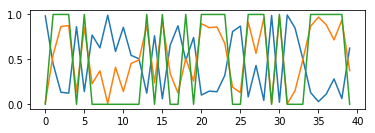

In [7]:
# Clasificacion del test set

y_test_predic = gnb.predict(x_test)
print(np.shape(y_test_predic))

# Estimacion de la probabilidad de x_test
x_test_prob = gnb.predict_proba(x_test)
print(np.shape(x_test_prob))

# Score de la estimacion 
scoreTest = like_func.score(x_test, y_test)
print('Score test-data:', scoreTest)

# Grafico de las probabilidades x_test_prob
ax = plt.subplot(2, 1, 1)
ax.plot(np.arange(np.shape(x_test_prob)[0]),x_test_prob[:,0])
ax.plot(np.arange(np.shape(x_test_prob)[0]),x_test_prob[:,1])
ax.plot(np.arange(np.shape(y_test_predic)[0]),y_test_predic)
plt.show()

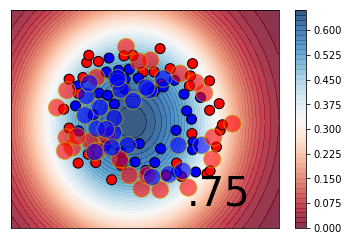

In [63]:
# Grafico

#plot_boundaries(x_train, x_test, y_train, y_test, score, probability_func, h = .02, ax = None)
plot_boundaries(x_train, x_test, y_train, y_test, scoreTrain, gnb.predict_proba)

